# Newton Fractals
---
This is a notebook about Newton fractals. I thought this would be a neat subject to bring up in the context of how complex numbers can be interpreted as vector or even matrix quantities, and that multiplications and divisions of complex numbers with one another can be conveniently interpreted as linear operations/operators. As such, this gives a pretty organic connection between matrix operations and fractal images/structures.

If you're new to `.ipynb` notebooks, make sure to run *all* cells here to make sure you have all the imports/tools you need available.

I borrowed *heavily* from Rafa Rodríguez Galván's GitHub repo for this one:

https://github.com/rrgalvan

Specifically, I modified his Newton Fractal example (based on complex Newton iteration toward the roots of $f(z) = z^3-1$) for the illustration below.

https://github.com/rrgalvan/python-mnii/blob/master/1-ceros-de-funciones/Newton-Fractal.ipynb

In [7]:
# Preparing the fractal image data

import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Newton fractals
# Based on FB - 201003291, http://code.activestate.com/

# image resolution (x and y pixels)
imgx = 1200
imgy = 1200
image = Image.new("RGB", (imgx, imgy))

# Complex window (range in x (real) and y (imaginary))
xa = -1.0
xb = 1.0
ya = -1.0
yb = 1.0

maxIt = 20 # max Newton iterations allowed
h = 1e-8 # step size for approximate numerical derivative
eps = 1e-5 # max error allowed (in Newton method convergence)

# Feel free to change the complex function here to generate other fractals!
# Examples: https://en.wikipedia.org/wiki/Newton_fractal
def f(z):
    return z * z * z - 1.0

def hexToRgb(value):
    """Return (red, green, blue) for the color given as #rrggbb."""
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

# (from Brad, 3/24/19) I hand-rolled the rootColorize method, so you'll likely 
# have to change that if you change the function (for the prettiest plots ;) ).
def rootColorize(z):
    # hardcoded roots of f(z) = z^3 - 1
    root1 = complex(1,0)
    root2 = complex(-0.5,3**0.5)
    root3 = complex(-0.5,-3**0.5)
    
    dist1 = abs(root1-z)
    dist2 = abs(root2-z)
    dist3 = abs(root3-z)
    
    # colors from Ibotta :)

    if dist1 < dist2 and dist1 < dist3:
        return 10, 227, 210
    elif dist2 < dist1 and dist2 < dist3:
        return 232, 70, 120
    elif dist3 < dist1 and dist3 < dist2:
        return 128, 8, 84
    
    return 0, 0, 0

# Create fractal image from Cartesian lattice of complex inputs
print("Running complex newton iterations from %i x %i pixels" % (imgx,imgy), end="... ")
for y in range(imgy):
    # scaling imaginary component from pixel map
    zy = y * (yb - ya) / (imgy - 1) + ya
    for x in range(imgx):
        # scaling real component from pixel map
        zx = x * (xb - xa) / (imgx - 1) + xa
        z = complex(zx, zy)
        for i in range(maxIt):
            # approximation of complex numerical derivative
            dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
            z0 = z - f(z) / dz    # Newton iteration
            if abs(z0 - z) < eps: # stop when close enough to any root
                break
            z = z0
        r, g, b = rootColorize(z)
        image.putpixel((x, y), (r, g, b))
print ("¡bien!")

Running complex newton iterations from 1200 x 1200 pixels... ¡bien!


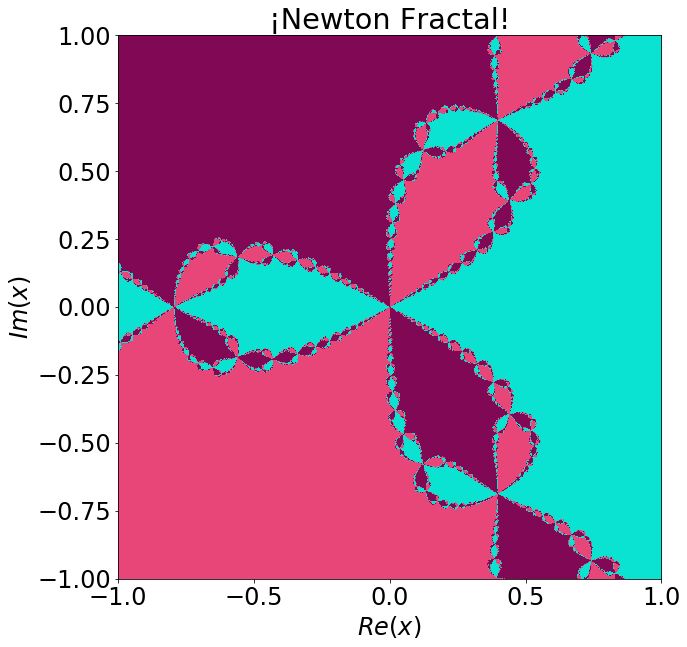

In [8]:
# Plotting the fractal image

plt.rcParams['font.size'] = 24
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(image, extent=[xa,xb,ya,yb])
plt.title("¡Newton Fractal!")
plt.xlabel('$Re(x)$')
plt.ylabel('$Im(x)$');